In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('/content/sales_data.csv')

In [ ]:
#top 5 rows
df.head(5)

,date,product,category,price,quantity,revenue
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0
2,1/2/2022,T-Shirt,Clothing,20.0,50.0,1000.0
3,1/3/2022,Headphones,Electronics,100.0,20.0,2000.0
4,1/4/2022,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
# shape of the data
print(df.shape)

(369, 6)


In [5]:
#type of the data
print(df.dtypes)

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object


In [6]:
# checking missing values
df.isnull().sum()

,0
date,0
product,0
category,0
price,2
quantity,1
revenue,1


In [7]:
#handling null values
df.fillna(df['price'].mean(),inplace=True)

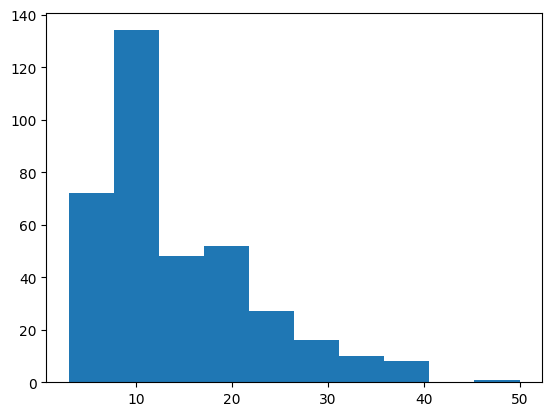

In [ ]:
#visualize numeric data
plt.hist(df["quantity"])
plt.show()

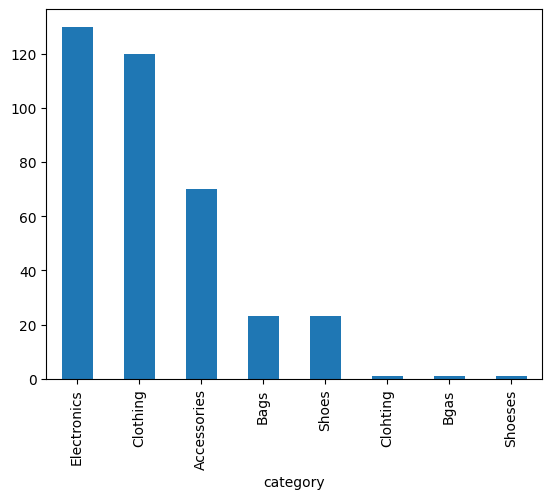

In [8]:
# visualize the distribution of the categorical column
df['category'].value_counts().plot(kind='bar')
plt.show()

In [9]:
#basic statistics for numeric column
print(df['revenue'].describe())

count     369.000000
mean     2055.667280
std      1910.759820
min       211.226158
25%       800.000000
50%      1200.000000
75%      2400.000000
max      7200.000000
Name: revenue, dtype: float64


In [10]:
# calculate the correlation between 2 numeric columns
print(df['quantity'].corr(df['price']))

-0.2593242724343455


In [11]:
# group the data by categorical column and calculate statistics
group=df.groupby('category')['price'].count()
print(group)

category
Accessories     70
Bags            23
Bgas             1
Clohting         1
Clothing       120
Electronics    130
Shoes           23
Shoeses          1
Name: price, dtype: int64


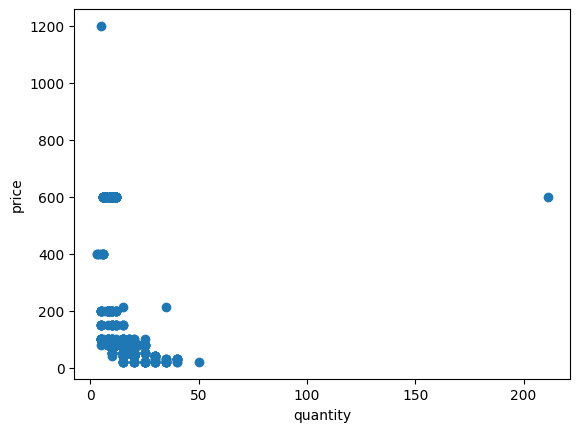

In [12]:
# create scatter plot to visualize between two numeric column
plt.scatter(df['quantity'],df['price'])
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()

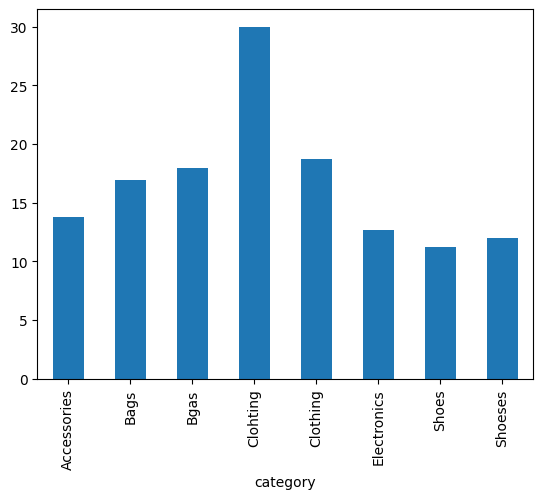

In [13]:
# visualize bar plot for numerical data by categorical data
df.groupby('category')['quantity'].mean().plot(kind='bar')
plt.show()

In [14]:
#pivot table
piv=pd.pivot_table(index='category',columns='product',values='revenue',data=df)
print(piv)


product        Backpack        Coat   Headphones       Hoodie       Jeans  \
category                                                                    
Accessories         NaN         NaN          NaN          NaN         NaN   
Bags         847.826087         NaN          NaN          NaN         NaN   
Bgas         900.000000         NaN          NaN          NaN         NaN   
Clohting            NaN         NaN          NaN  1200.000000         NaN   
Clothing            NaN  965.714286          NaN   860.869565  860.416667   
Electronics         NaN         NaN  1384.615385          NaN         NaN   
Shoes               NaN         NaN          NaN          NaN         NaN   
Shoeses             NaN         NaN          NaN          NaN         NaN   

product      Laptop   Smartphone   Smartwatch    Sneakers  Speaker  \
category                                                             
Accessories     NaN          NaN  1639.200727         NaN      NaN   
Bags            NaN

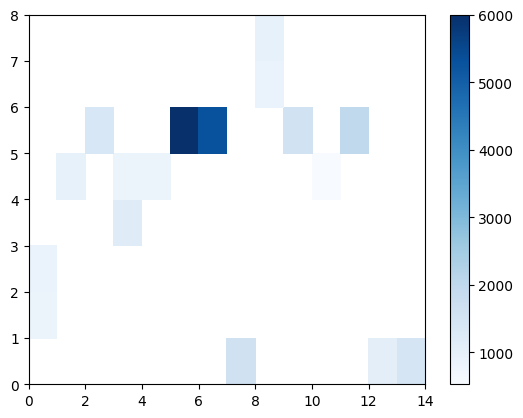

In [15]:
#heat map
plt.pcolor(piv,cmap='Blues')
plt.colorbar()
plt.show()

In [16]:
df.head(2)

,date,product,category,price,quantity,revenue
0,1/1/2022,Smartphone,Electronics,600.0,10.0,6000.0
1,1/1/2022,Laptop,Electronics,1200.0,5.0,6000.0


In [17]:
#date modification
df['sale_date']=pd.to_datetime(df['date'])
df['sale_month']=pd.to_datetime(df['date'])
df['sale_year']=pd.to_datetime(df['date'])
df['sale_date'].dt.date
df['sale_month'].dt.month
df['sale_year'].dt.year




,sale_year
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
364,2022
365,2022
366,2022
367,2022


<Axes: ylabel='price'>

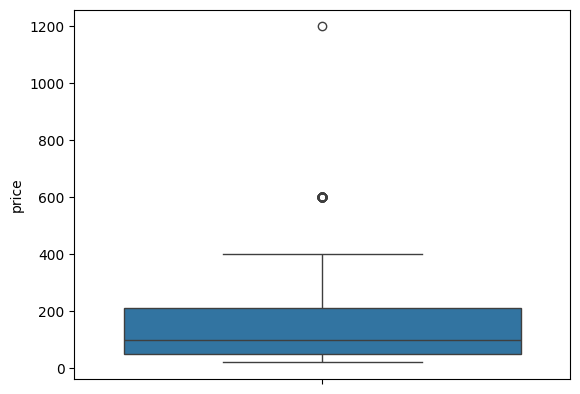

In [18]:
# find outlier
sns.boxplot(df['price'])

In [19]:
# IQR method
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
print(outliers)

           date     product     category   price  quantity  revenue  \
0      1/1/2022  Smartphone  Electronics   600.0      10.0   6000.0   
1      1/1/2022      Laptop  Electronics  1200.0       5.0   6000.0   
6      1/6/2022  Smartphone  Electronics   600.0       8.0   4800.0   
13    1/12/2022  Smartphone  Electronics   600.0      12.0   7200.0   
18    1/17/2022  Smartphone  Electronics   600.0       6.0   3600.0   
..          ...         ...          ...     ...       ...      ...   
348  12/11/2022  Smartphone  Electronics   600.0      12.0   7200.0   
352  12/15/2022  Smartphone  Electronics   600.0       6.0   3600.0   
358  12/21/2022  Smartphone  Electronics   600.0       7.0   4200.0   
363  12/26/2022  Smartphone  Electronics   600.0       9.0   5400.0   
367  12/30/2022  Smartphone  Electronics   600.0      11.0   6600.0   

     sale_date sale_month  sale_year  
0   2022-01-01 2022-01-01 2022-01-01  
1   2022-01-01 2022-01-01 2022-01-01  
6   2022-01-06 2022-01-06 2022

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        369 non-null    object        
 1   product     369 non-null    object        
 2   category    369 non-null    object        
 3   price       369 non-null    float64       
 4   quantity    369 non-null    float64       
 5   revenue     369 non-null    float64       
 6   sale_date   369 non-null    datetime64[ns]
 7   sale_month  369 non-null    datetime64[ns]
 8   sale_year   369 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(3), object(3)
memory usage: 26.1+ KB


In [ ]:
df.drop('date',axis=1,inplace=True)

In [22]:
df.drop(['sale_month','date','sale_year'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   product    369 non-null    object        
 1   category   369 non-null    object        
 2   price      369 non-null    float64       
 3   quantity   369 non-null    float64       
 4   revenue    369 non-null    float64       
 5   sale_date  369 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [26]:
df['product'].unique()

array(['Smartphone', 'Laptop', 'T-Shirt', 'Headphones', 'Watch', 'Tablet',
       'Coat', 'Smartwatch', 'Speaker', 'Backpack', 'Hoodie', 'Sneakers',
       'Wallet', 'Jeans'], dtype=object)

In [45]:
#labelEncoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['product']=encoder.fit_transform(df['product'])

In [46]:
df.head(10)

,product,category,price,quantity,revenue,sale_date,product_1
0,6,Electronics,600.0,10.0,6000.0,2022-01-01,6
1,5,Electronics,1200.0,5.0,6000.0,2022-01-01,5
2,10,Clothing,20.0,50.0,1000.0,2022-01-02,10
3,2,Electronics,100.0,20.0,2000.0,2022-01-03,2
4,10,Clothing,20.0,25.0,500.0,2022-01-04,10
5,13,Accessories,150.0,10.0,1500.0,2022-01-05,13
6,6,Electronics,600.0,8.0,4800.0,2022-01-06,6
7,11,Electronics,400.0,5.0,2000.0,2022-01-06,11
8,1,Clothing,100.0,10.0,1000.0,2022-01-07,1
9,7,Accessories,200.0,12.0,2400.0,2022-01-08,7


In [47]:
df['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

In [48]:
#label encoding for Category column
from sklearn.preprocessing import LabelEncoder
encoder_1=LabelEncoder()
df['category_1']=encoder_1.fit_transform(df['category'])

In [49]:
df.head(10)

,product,category,price,quantity,revenue,sale_date,product_1,category_1
0,6,Electronics,600.0,10.0,6000.0,2022-01-01,6,5
1,5,Electronics,1200.0,5.0,6000.0,2022-01-01,5,5
2,10,Clothing,20.0,50.0,1000.0,2022-01-02,10,4
3,2,Electronics,100.0,20.0,2000.0,2022-01-03,2,5
4,10,Clothing,20.0,25.0,500.0,2022-01-04,10,4
5,13,Accessories,150.0,10.0,1500.0,2022-01-05,13,0
6,6,Electronics,600.0,8.0,4800.0,2022-01-06,6,5
7,11,Electronics,400.0,5.0,2000.0,2022-01-06,11,5
8,1,Clothing,100.0,10.0,1000.0,2022-01-07,1,4
9,7,Accessories,200.0,12.0,2400.0,2022-01-08,7,0


In [50]:
df.drop('product_1',axis=1,inplace=True)

In [51]:
df.head(10)

,product,category,price,quantity,revenue,sale_date,category_1
0,6,Electronics,600.0,10.0,6000.0,2022-01-01,5
1,5,Electronics,1200.0,5.0,6000.0,2022-01-01,5
2,10,Clothing,20.0,50.0,1000.0,2022-01-02,4
3,2,Electronics,100.0,20.0,2000.0,2022-01-03,5
4,10,Clothing,20.0,25.0,500.0,2022-01-04,4
5,13,Accessories,150.0,10.0,1500.0,2022-01-05,0
6,6,Electronics,600.0,8.0,4800.0,2022-01-06,5
7,11,Electronics,400.0,5.0,2000.0,2022-01-06,5
8,1,Clothing,100.0,10.0,1000.0,2022-01-07,4
9,7,Accessories,200.0,12.0,2400.0,2022-01-08,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   product     369 non-null    int64         
 1   category    369 non-null    object        
 2   price       369 non-null    float64       
 3   quantity    369 non-null    float64       
 4   revenue     369 non-null    float64       
 5   sale_date   369 non-null    datetime64[ns]
 6   category_1  369 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.3+ KB


In [56]:
# Assuming 'encoder_1' is the LabelEncoder used for 'category' column to create 'category_1'
category_mapping = dict(zip(encoder_1.classes_,[int(i) for i in encoder_1.transform(encoder_1.classes_)]))
print(category_mapping)

{'Accessories': 0, 'Bags': 1, 'Bgas': 2, 'Clohting': 3, 'Clothing': 4, 'Electronics': 5, 'Shoes': 6, 'Shoeses': 7}


In [57]:
df.drop('category',axis=1,inplace=True)

In [58]:
df.head(5)

,product,price,quantity,revenue,sale_date,category_1
0,6,600.0,10.0,6000.0,2022-01-01,5
1,5,1200.0,5.0,6000.0,2022-01-01,5
2,10,20.0,50.0,1000.0,2022-01-02,4
3,2,100.0,20.0,2000.0,2022-01-03,5
4,10,20.0,25.0,500.0,2022-01-04,4


In [ ]:
# ✅ EDA and Preprocessing Completed:
# - Null values handled
# - Categorical features encoded using LabelEncoder / OneHotEncoder
# - Unwanted columns dropped
# - Date columns converted to datetime
# - Final dataset is clean and ready for modeling
